In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import trackpy.predict
from scipy.misc import imsave
from scipy.misc import imread
################################################
# Read frames which have been data-cleaned (wire_particle_tracking_datacleaning). 
################################################
picL = 18333
picR = 18158
FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum0_*.tif'.format(picL))
FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum0_*.tif'.format(picR))
#FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_white_*.tif'.format(picL))
#FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_white_*.tif'.format(picR))
v0L = imread('./frame_18333_white.tif')
v0R = imread('./frame_18158_white.tif')

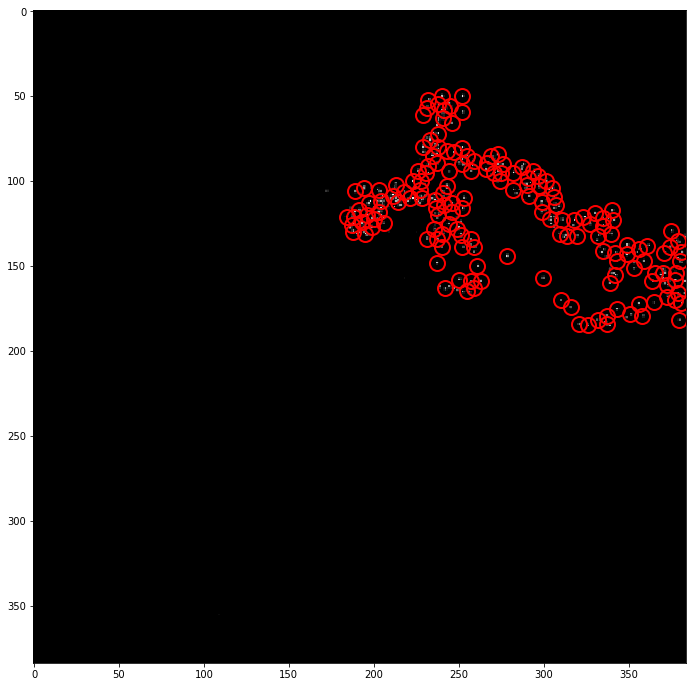

In [19]:
###################################
#Locate Features; single frame test
###################################
init_index = 400
f = tp.locate(FrameL[init_index], 3, minmass=5) 
#Show points located. It will be better to have more points rather than missing points.
plt.figure(figsize=[12,12])  # make a new figure
tp.annotate(f, FrameL[init_index]);

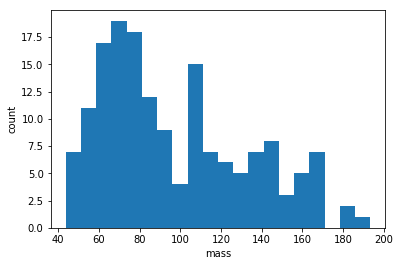

In [20]:
#Show 'mass' distribution
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)
# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');
plt.show()

In [21]:
######################################################################
#Locate Features; apply the same parameter to all frames
######################################################################
# Left frame
pred = trackpy.predict.NearestVelocityPredict()
#pred = trackpy.predict.ChannelPredict(0.5, 'x', minsamples=3)
fL = tp.batch(FrameL, 3, minmass=5);
tL = pred.link_df(fL, 3, memory=5,  diagnostics=True)
tL.head()

Frame 3999: 22 trajectories present


,diag_remembered,diag_search_range,diag_subnet,diag_subnet_iterations,diag_subnet_size,ecc,ep,frame,mass,particle,raw_mass,signal,size,x,y
0,NaN,NaN,NaN,NaN,NaN,0.552381,0.0,1,108.853114,0.0,255.0,35.586595,0.820413,35.0,63.955128
1,NaN,NaN,NaN,NaN,NaN,0.552381,0.0,1,108.853114,1.0,255.0,35.586595,0.820413,37.0,68.044872
2,NaN,NaN,NaN,NaN,NaN,0.453571,0.0,1,113.597993,2.0,255.0,35.447040,0.829434,341.0,71.000000
3,NaN,NaN,NaN,NaN,NaN,0.453237,0.0,1,112.760662,3.0,253.0,35.167929,0.829529,296.0,262.000000
4,NaN,NaN,NaN,NaN,NaN,0.453237,0.0,1,112.760662,4.0,253.0,35.167929,0.829529,239.0,318.000000


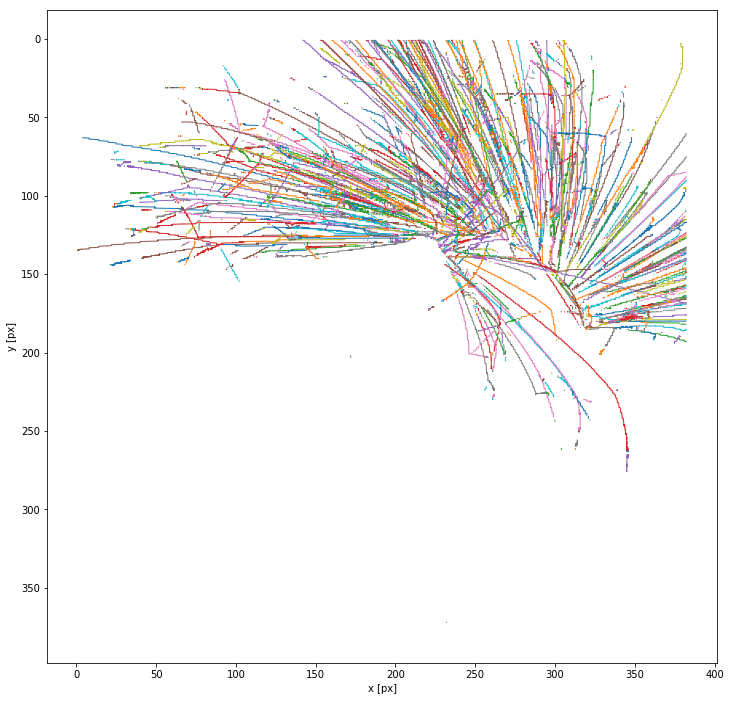

In [22]:
plt.figure(figsize=[12,12])
tp.plot_traj(tL);

In [56]:
tL0 = tL[tL['particle']==500]
tL_arr = np.array(tL0['frame'])
tL_arr.shape[0]


,diag_remembered,diag_search_range,diag_subnet,diag_subnet_iterations,diag_subnet_size,ecc,ep,frame,mass,particle,raw_mass,signal,size,x,y
118,NaN,3,NaN,NaN,NaN,0.336043,0.002223,293,118.653074,500.0,387.0,33.472171,0.847289,277.918288,110.071984
117,NaN,3,NaN,NaN,NaN,0.372973,0.001846,294,119.043811,500.0,377.0,34.986158,0.840302,277.925573,110.070611
115,NaN,3,NaN,NaN,NaN,0.375000,0.001870,295,118.507712,500.0,360.0,34.275388,0.843075,277.928166,110.037807
114,NaN,3,NaN,NaN,NaN,0.376506,0.001712,296,112.099034,500.0,345.0,33.082305,0.839573,277.912951,110.014862
120,NaN,3,NaN,NaN,NaN,0.428105,0.002312,297,112.376725,500.0,333.0,33.325512,0.838718,277.903448,109.995402
116,NaN,3,NaN,NaN,NaN,0.425532,0.003131,298,108.229388,500.0,306.0,31.156945,0.843873,277.909091,109.969697


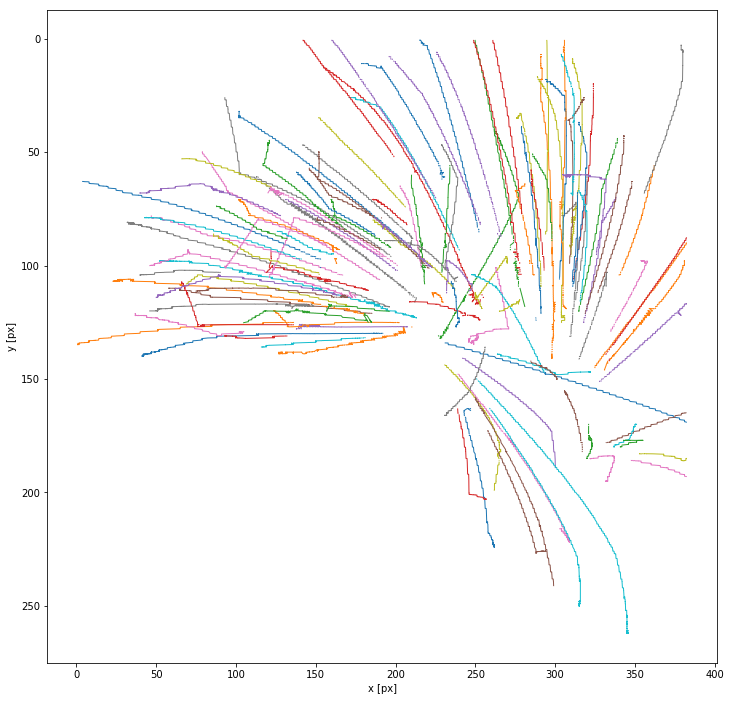

In [33]:
tL1 = tp.filter_stubs(tL,100)
plt.figure(figsize=[12,12])
tp.plot_traj(tL1);

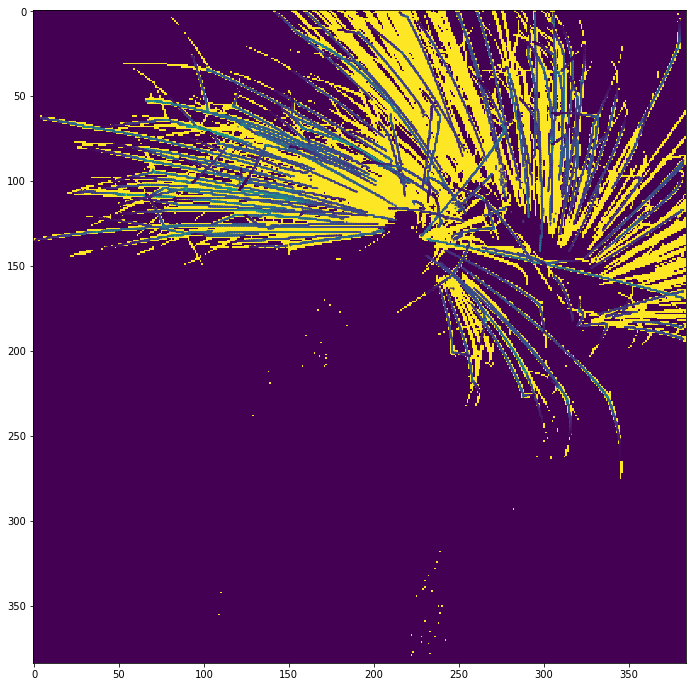

In [34]:
plt.figure(figsize=[12,12])
plt.imshow(v0L)
plt.scatter(tL1['x'],tL1['y'],s=0.3,c=tL1['mass'])
plt.show()

In [27]:
Track = tL1[tL1['particle']==111]
Track

,diag_remembered,diag_search_range,diag_subnet,diag_subnet_iterations,diag_subnet_size,ecc,ep,frame,mass,particle,raw_mass,signal,size,x,y
frame,,,,,,,,,,,,,,,
26,NaN,3,12,1,1,0.575107,0.000000,26,59.783077,111.0,180.0,18.078116,0.835227,262.206587,126.000000
27,NaN,3,NaN,NaN,NaN,0.691111,0.000000,27,119.500962,111.0,378.0,33.460269,0.848528,264.017600,125.036800
28,NaN,3,NaN,NaN,NaN,0.712750,0.000000,28,185.778788,111.0,623.0,52.288732,0.847669,264.035320,125.018764
29,NaN,3,NaN,NaN,NaN,0.746421,0.000000,29,163.251339,111.0,532.0,43.566324,0.856232,264.002999,124.986507
31,1,3,41,19,3,0.560117,0.000198,31,212.411441,111.0,550.0,55.291481,0.860056,262.065076,125.036876
33,1,3,58,8,2,0.562363,0.000536,33,267.164717,111.0,976.0,67.989716,0.863431,261.991843,124.853181
38,4,3,NaN,NaN,NaN,0.602941,0.000276,38,258.870415,111.0,853.0,66.635910,0.861736,262.967239,123.035881
42,3,3,NaN,NaN,NaN,0.668161,0.000243,42,225.552798,111.0,777.0,60.097949,0.856477,262.952303,122.050987
43,NaN,3,NaN,NaN,NaN,0.509434,0.000233,43,233.384839,111.0,658.0,61.852376,0.857308,262.043143,122.032357


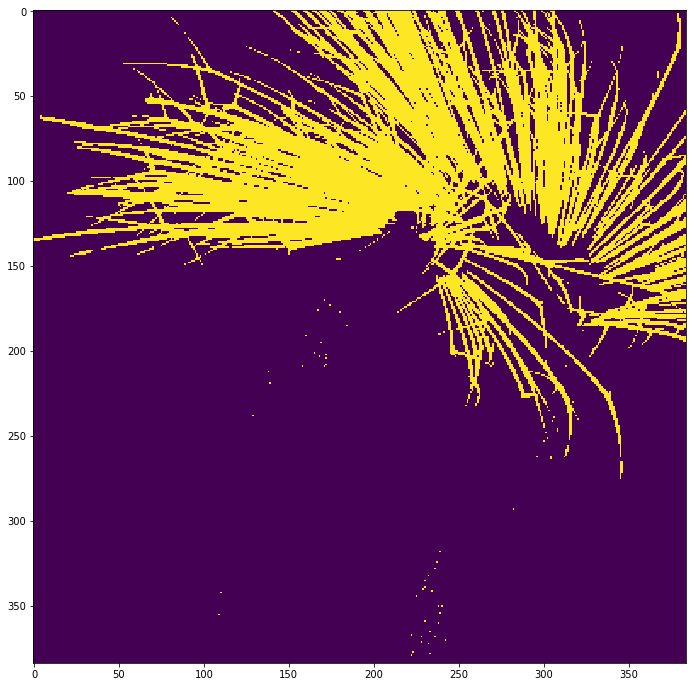

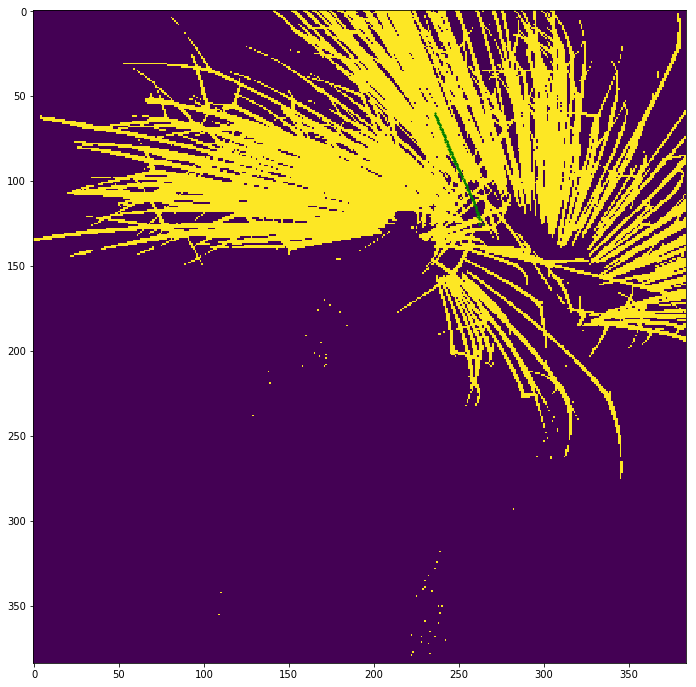

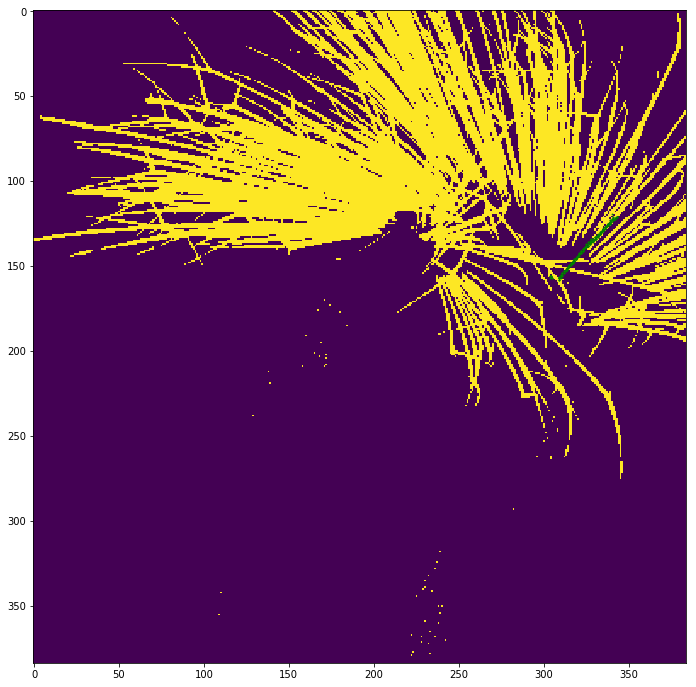

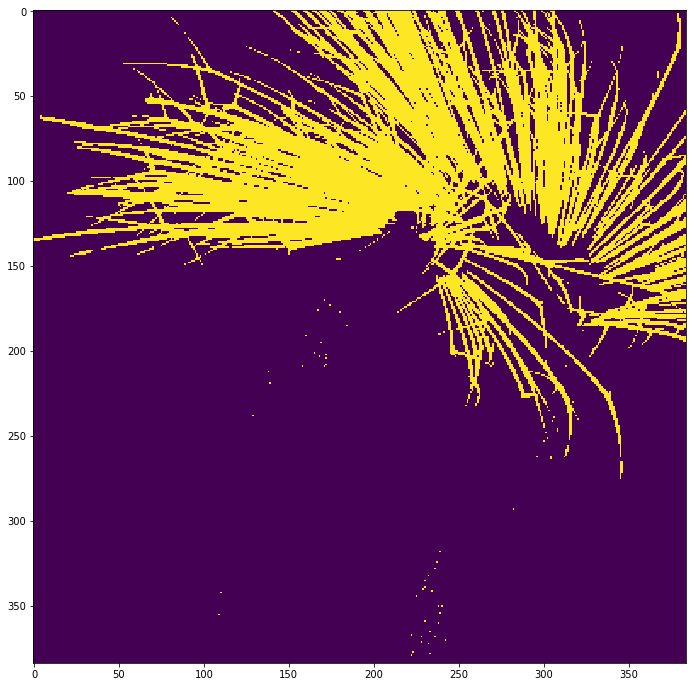

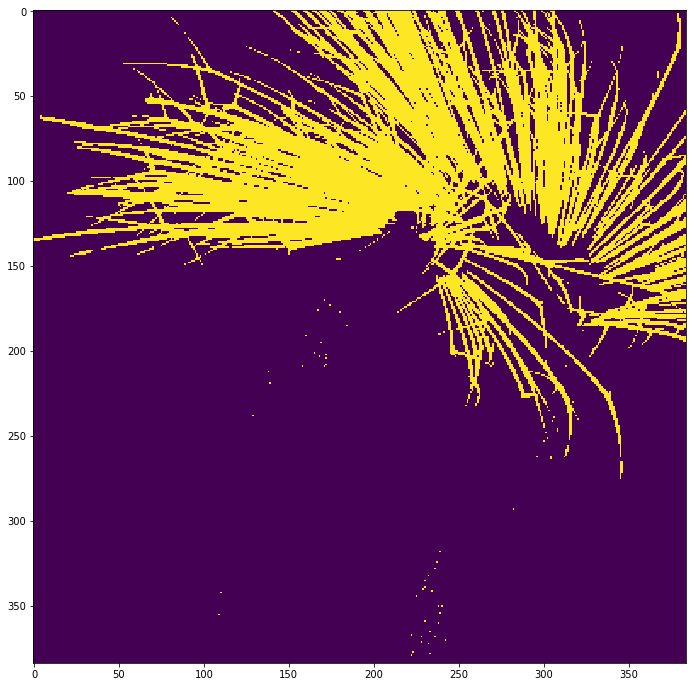

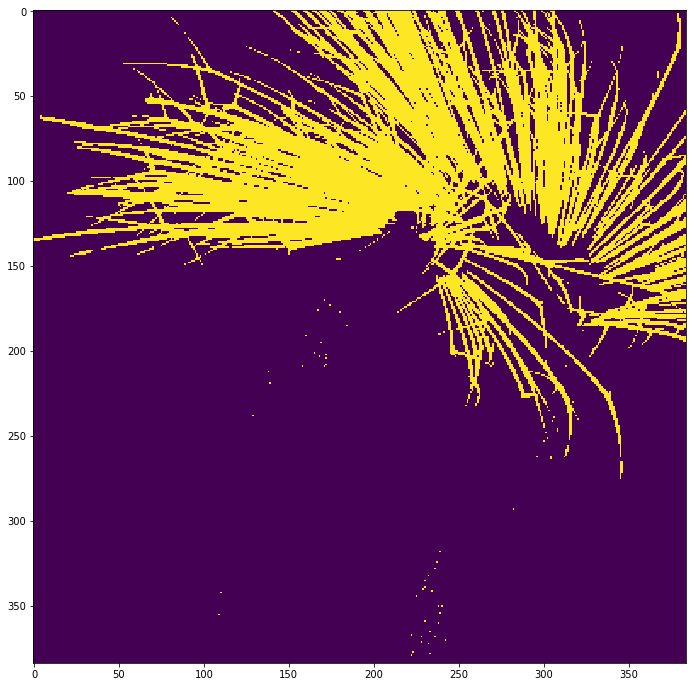

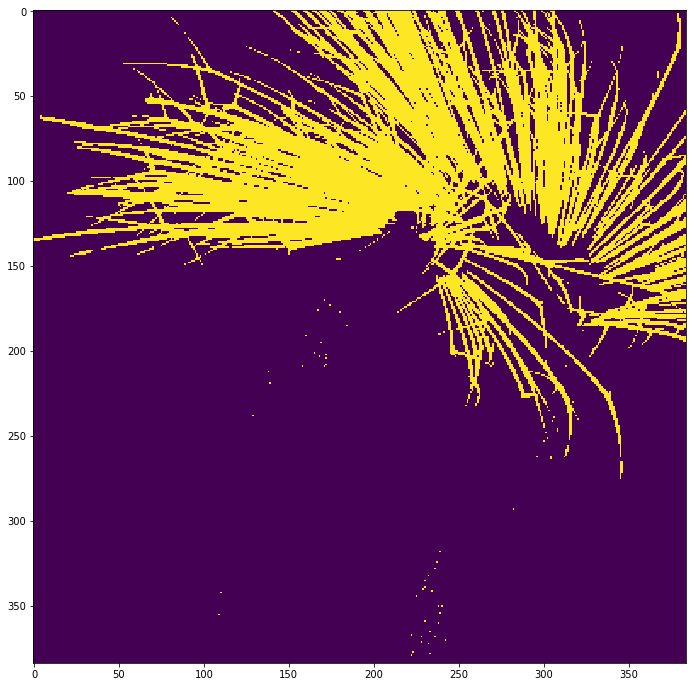

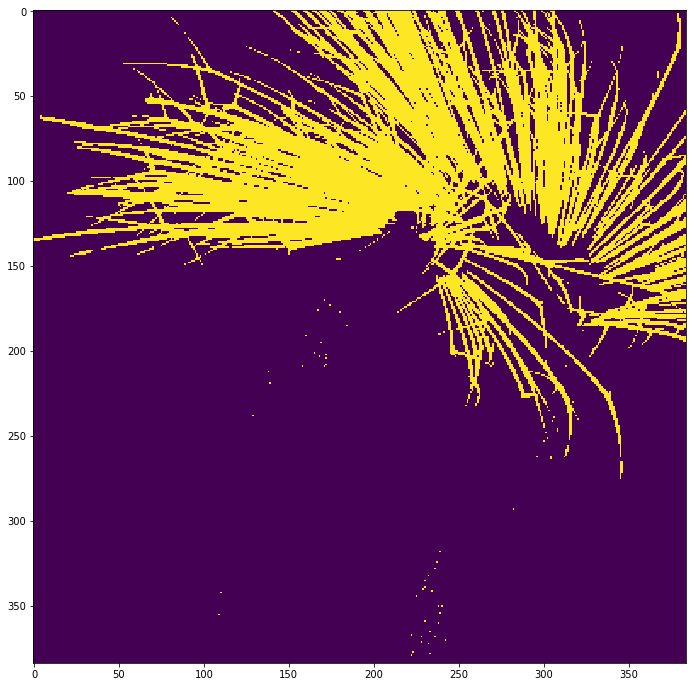

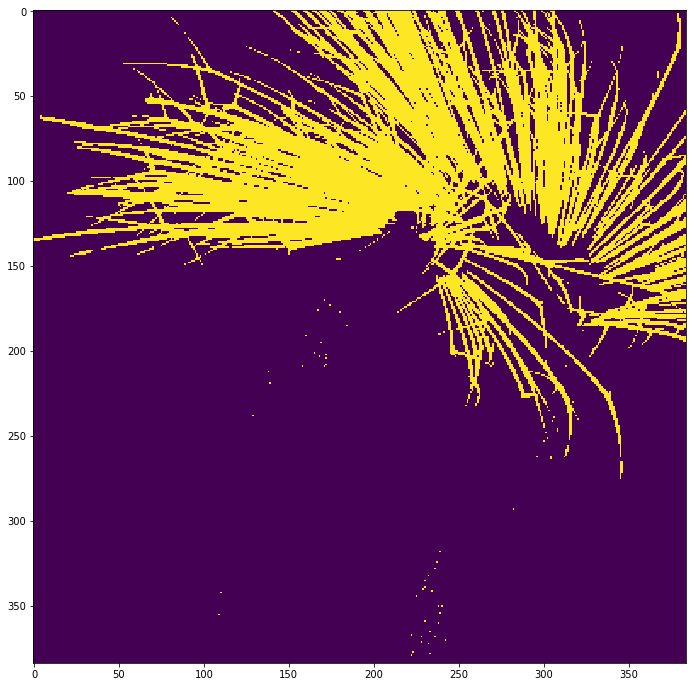

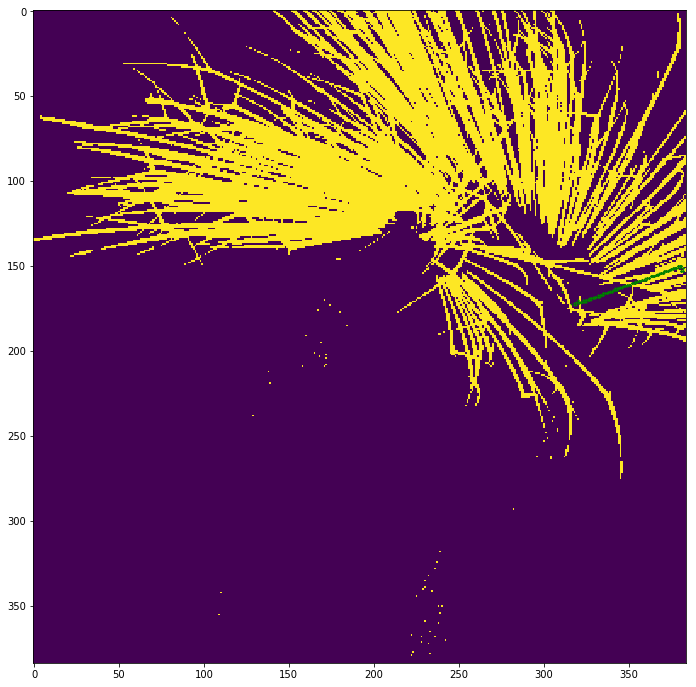

In [30]:
#for ii in tL['particle'].unique():
for ii in range(110,120):  
    Track = tL1[tL1['particle']==ii]
    plt.figure(figsize=[12,12])
    plt.imshow(v0L)
    plt.scatter(Track['x'],Track['y'],s=0.7,c='g')
    plt.show()

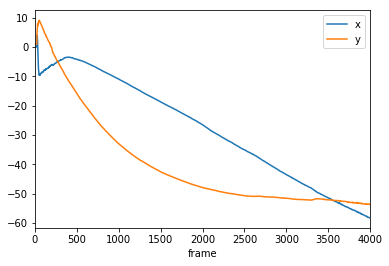

In [9]:
d = tp.compute_drift(tL)
plt.figure()
d.plot()
plt.show()